In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import scipy.ndimage as ndimage
import os

In [11]:
model = tf.keras.models.load_model(r'Model/digit_recoginition.h5')

TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [9]:
lis=[]
image_path='images/sheet/k/'
for filename in os.listdir(image_path):
    lis.append(filename)

In [ ]:
lis.sort(key=lambda f: int("".join(filter(str.isdigit, f))))
print(lis)

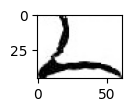

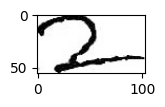

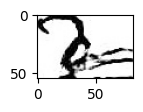

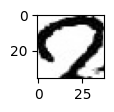

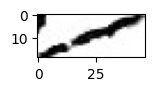

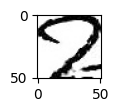

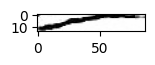

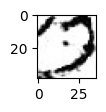

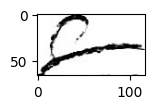

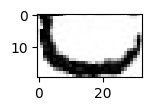

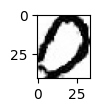

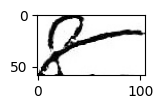

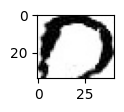

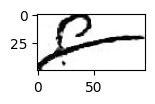

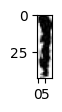

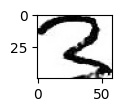

In [5]:
i=0
key=1
each_qn = {}
for filename in lis:
    if filename.endswith(".jpg"):
        each_qn[key]=[]
        img_path = os.path.join(image_path, filename)
        image = cv2.imread(img_path)
        input_copy = image.copy()
        org_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


        img_gray = cv2.threshold(org_image, 150, 255, cv2.THRESH_BINARY_INV)[1]
        inverted_image = cv2.bitwise_not(img_gray)
        kernel = np.ones((3, 3), np.uint8)
        img_morphex = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
        img_morphex = cv2.bitwise_not(img_morphex)
        #plt.imshow(img_morphex, cmap='gray')
        #plt.show()

        contours, hierarchy = cv2.findContours(img_morphex, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        img_contours = np.zeros(image.shape)
        image_copy = img_morphex.copy()

        #cv2.drawContours(input_copy, contours, -1, (0, 255, 0), 3)
        #cv2_imshow(input_copy)

        contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
        for _, c in enumerate(contours):
            boundRect = cv2.boundingRect(c)

            rectX = boundRect[0]
            rectY = boundRect[1]
            rectWidth = boundRect[2]
            rectHeight = boundRect[3]

            rectArea = rectWidth * rectHeight

            minArea = 400
            if rectArea > minArea:
                i += 1
                color = (0, 255, 0)
                cv2.rectangle(input_copy, (int(rectX), int(rectY)),
                              (int(rectX + rectWidth), int(rectY + rectHeight)), color, 1)
                #cv2_imshow(input_copy)

                #if i > 1:
                    #plt.imshow(input_copy)
                    #plt.show()


                currentCrop = image[rectY:rectY + rectHeight, rectX:rectX + rectWidth]

                cv2.imwrite("images/sheet/k/"+ str(i) +'.jpg', currentCrop)
                
                each_qn[key].append(i)
                plt.subplot(5, 4, 1)
                plt.imshow(currentCrop)
                plt.show()

        key+=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [6]:
each_qn

{1: [1],
 2: [2],
 3: [3],
 4: [4, 5],
 5: [6, 7],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [8, 9],
 12: [10],
 13: [11, 12],
 14: [],
 15: [13, 14],
 16: [],
 17: [15, 16],
 18: [],
 19: [],
 20: [],
 21: [],
 22: []}

In [7]:
lis=[]
image_path='images/rec/'
for filename in os.listdir(image_path):
    lis.append(filename)
lis.sort(key=lambda f: int("".join(filter(str.isdigit, f))))
print(lis)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg']


In [8]:
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)
    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [9]:
i=0
for filename in lis:
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_path, filename)
        image = cv2.imread(img_path)
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(255-img_gray, (28,28))
        while np.sum(gray[0]) == 0:
            gray = gray[1:]

        while np.sum(gray[:,0]) == 0:
            gray = np.delete(gray,0,1)

        while np.sum(gray[-1]) == 0:
            gray = gray[:-1]

        while np.sum(gray[:,-1]) == 0:
            gray = np.delete(gray,-1,1)

        rows,cols = gray.shape
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        gray = cv2.resize(gray, (cols, rows))
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(gray, (28, 28))
    image = image / 255.0
    input_image = np.reshape(image, (1, 28, 28))
    predicted_labels = model.predict(input_image)
    predicted_digit = np.argmax(predicted_labels)
    print(f"Predicted Digit: {filename ,predicted_digit}")

/tmp/ipykernel_9696/4145820049.py:2: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cy,cx = ndimage.measurements.center_of_mass(img)


1/1 [==============================] - 0s 280ms/step
Predicted Digit: ('1.jpg', 6)
1/1 [==============================] - 0s 49ms/step
Predicted Digit: ('2.jpg', 1)
1/1 [==============================] - 0s 52ms/step
Predicted Digit: ('3.jpg', 1)
1/1 [==============================] - 0s 48ms/step
Predicted Digit: ('4.jpg', 2)
1/1 [==============================] - 0s 54ms/step
Predicted Digit: ('5.jpg', 2)
1/1 [==============================] - 0s 48ms/step
Predicted Digit: ('6.jpg', 1)
1/1 [==============================] - 0s 48ms/step
Predicted Digit: ('7.jpg', 2)
1/1 [==============================] - 0s 51ms/step
Predicted Digit: ('8.jpg', 0)
1/1 [==============================] - 0s 72ms/step
Predicted Digit: ('9.jpg', 3)
1/1 [==============================] - 0s 72ms/step
Predicted Digit: ('10.jpg', 0)
1/1 [==============================] - 0s 54ms/step
Predicted Digit: ('11.jpg', 3)
1/1 [==============================] - 0s 53ms/step
Predicted Digit: ('12.jpg', 8)


In [10]:
image_path = r'images/sheet/k/3.jpg'

In [11]:
image = cv2.imread(image_path)

In [12]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

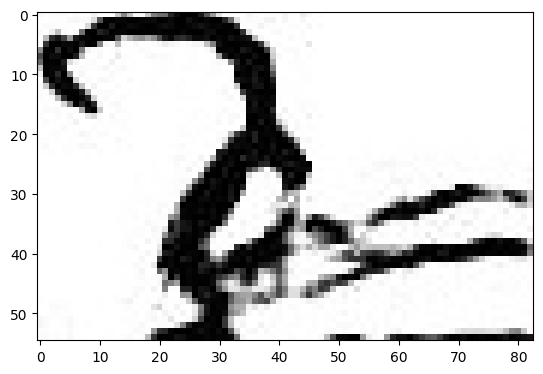

In [13]:
plt.imshow(img_gray, cmap='gray')

In [14]:
gray = cv2.resize(255-img_gray, (28,28))

In [15]:
np.shape(gray)

(28, 28)

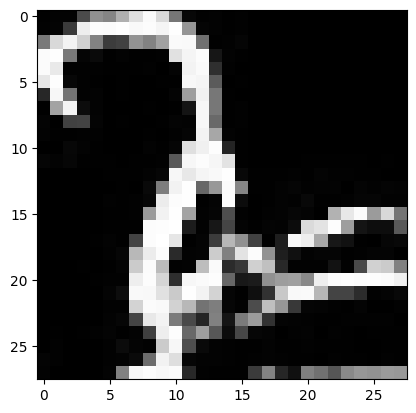

In [16]:
plt.imshow(gray, cmap='gray')

In [17]:
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)
    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [18]:
while np.sum(gray[0]) == 0:
    gray = gray[1:]

while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)

while np.sum(gray[-1]) == 0:
    gray = gray[:-1]

while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)

rows,cols = gray.shape

In [19]:
if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    gray = cv2.resize(gray, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    gray = cv2.resize(gray, (cols, rows))

In [20]:
colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

In [21]:
shiftx,shifty = getBestShift(gray)
shifted = shift(gray,shiftx,shifty)
gray = shifted

/tmp/ipykernel_9696/4145820049.py:2: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cy,cx = ndimage.measurements.center_of_mass(img)


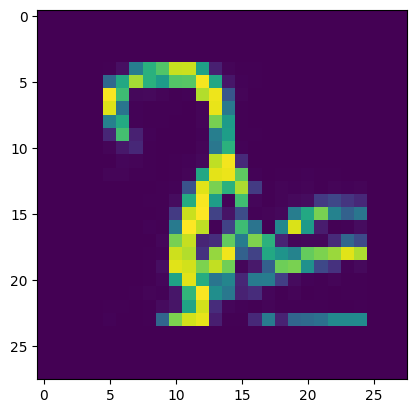

In [22]:
plt.imshow(gray)

In [23]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(gray, (28, 28))
image = image / 255.0
input_image = np.reshape(image, (1, 28, 28))

In [24]:
predicted_labels = model.predict(input_image)
predicted_digit = np.argmax(predicted_labels)
print(f"Predicted Digit: {predicted_digit}")

1/1 [==============================] - 0s 48ms/step
Predicted Digit: 2


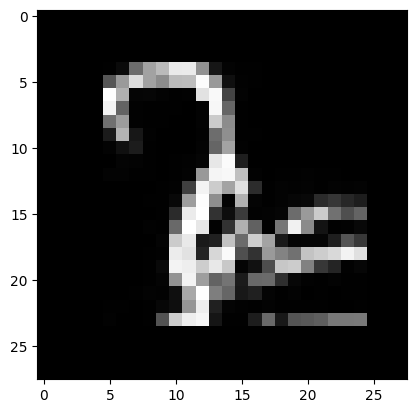

In [25]:
plt.imshow(gray, cmap='gray')